# Dane

Jako zmienne objaśniąjące użyłem poniższe wskaźniki ekonomiczne

1. wskaźnik europejskiego agregatu pieniężnego m3 z https://sdw.ecb.europa.eu/quickview.do?SERIES_KEY=117.BSI.M.U2.Y.V.M30.X.I.U2.2300.Z01.A
4. gdp rate euro area z https://fred.stlouisfed.org/series/EA19LORSGPORGYSAM
edynie płatne w cenie $49 miesiąc zatem postanowilem użyć danych światowych)
6. interest rate euro area z https://fred.stlouisfed.org/series/INTDSREZM193N

Import danych

In [ ]:
import os
import pandas as pd

os.getcwd()

'/content'

In [ ]:
inf = pd.read_excel('inflacja.xlsx')
int_rate = pd.read_excel('interest rate.xls')
m3 = pd.read_excel('european_m3.xlsx')
gdp = pd.read_excel('european gdp.xls')

print(inf)
print(int_rate)
print(m3)
print(gdp)

    COICOP (Labels)  inf
0           2002-01  2.5
1           2002-02  2.8
2           2002-03  2.6
3           2002-04  1.4
4           2002-05 -1.6
..              ...  ...
233         2021-06  1.6
234         2021-07  2.8
235         2021-08  3.6
236         2021-09  4.2
237         2021-10  4.7

[238 rows x 2 columns]
          date  interest_rate
0   1999-01-01           4.50
1   1999-02-01           4.50
2   1999-03-01           4.50
3   1999-04-01           3.50
4   1999-05-01           3.50
..         ...            ...
212 2016-09-01           0.25
213 2016-10-01           0.25
214 2016-11-01           0.25
215 2016-12-01           0.25
216 2017-01-01           0.25

[217 rows x 2 columns]
        date   M3
0    2021-10  7.7
1    2021-09  7.5
2    2021-08  8.0
3    2021-07  7.7
4    2021-06  8.4
..       ...  ...
257  2000-05  5.4
258  2000-04  5.8
259  2000-03  6.0
260  2000-02  5.8
261  2000-01  5.0

[262 rows x 2 columns]
    observation_date        gdp
0         1961-03-01

zmiana na dat na datetime

In [ ]:
m3['date'] = m3['date'].apply(lambda x: pd.to_datetime(x))
inf['COICOP (Labels)'] = inf['COICOP (Labels)'].apply(lambda x: pd.to_datetime(x))

sprawdzanie pustych komórek

In [ ]:
inf.isna().sum()

COICOP (Labels)    0
inf                0
dtype: int64

In [ ]:
m3.isna().sum()

date    0
M3      0
dtype: int64

In [ ]:
gdp.isna().sum()

observation_date    0
gdp                 0
dtype: int64

In [ ]:
int_rate.isna().sum()

date             0
interest_rate    0
dtype: int64

brak brakujących danych

merge

In [ ]:
df = inf.merge(m3, how = 'left', left_on = 'COICOP (Labels)', right_on = 'date')
df.drop('date', inplace = True, axis = 1)
df = df.merge(gdp, how = 'left', left_on = 'COICOP (Labels)', right_on = 'observation_date')
df.drop('observation_date', inplace = True, axis = 1)
df = df.merge(int_rate, how = 'left', left_on = 'COICOP (Labels)', right_on = 'date')
df.drop('date', inplace = True, axis = 1)

In [ ]:
df.head(2)

,COICOP (Labels),inf,M3,gdp,interest_rate
0,2002-01-01,2.5,7.8,0.901042,4.25
1,2002-02-01,2.8,7.4,0.800613,4.25


zmień nazwy i reogranizuj kolumny

In [ ]:
df.rename(columns = {'COICOP (Labels)':'date','M3':'m3','interest_rate':'int_rate'}, inplace = True)
df = df[['date', 'm3', 'gdp', 'int_rate', 'inf']]

In [ ]:
df

,date,m3,gdp,int_rate,inf
0,2002-01-01,7.8,0.901042,4.25,2.5
1,2002-02-01,7.4,0.800613,4.25,2.8
2,2002-03-01,7.3,0.769820,4.25,2.6
3,2002-04-01,7.3,0.800110,4.25,1.4
4,2002-05-01,7.8,0.872959,4.25,-1.6
...,...,...,...,...,...
233,2021-06-01,8.4,NaN,NaN,1.6
234,2021-07-01,7.7,NaN,NaN,2.8
235,2021-08-01,8.0,NaN,NaN,3.6
236,2021-09-01,7.5,NaN,NaN,4.2


sprawdze brakujące dane po zmergowaniu dataframe'ów

In [ ]:
df.isna().sum()

date         0
m3           0
gdp          5
int_rate    57
inf          0
dtype: int64

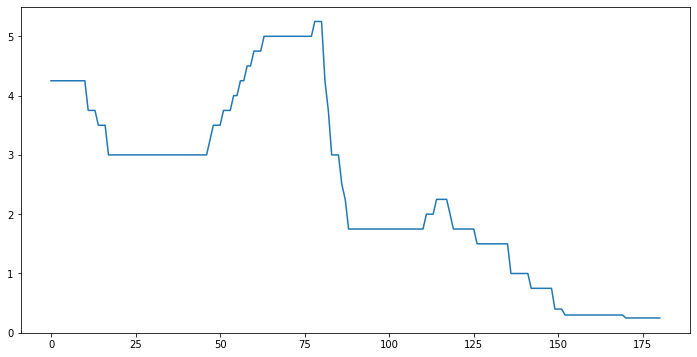

In [ ]:
df['int_rate'].plot(figsize = (12,6))

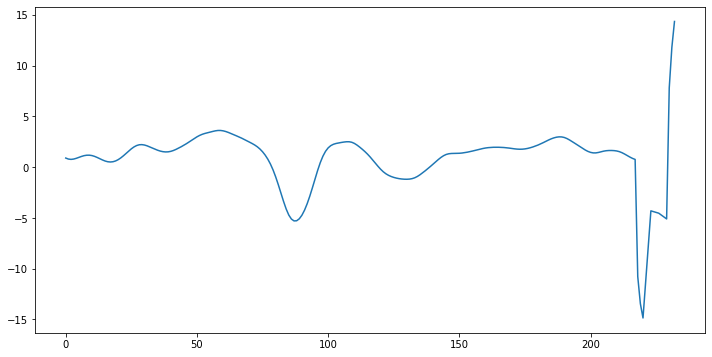

In [ ]:
df['gdp'].plot(figsize = (12,6))

Wypełniam puste miejsca funkcją interpolation, która wypełni puste dane z pomocą interpolacji liniowej

In [ ]:
df['gdp'].interpolate(method='linear', inplace = True)
df['int_rate'].interpolate(method='linear',inplace = True)
df.isna().sum()

date        0
m3          0
gdp         0
int_rate    0
inf         0
dtype: int64

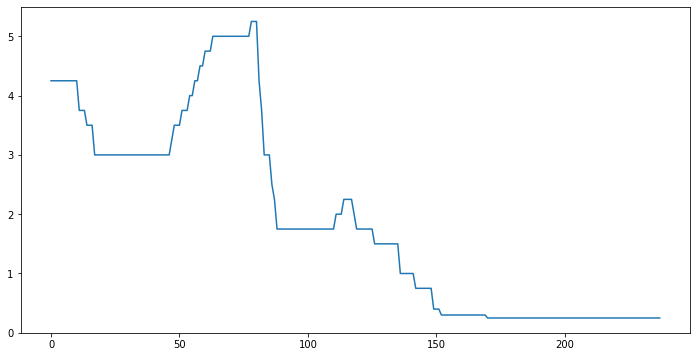

In [ ]:
df['int_rate'].plot(figsize = (12,6))

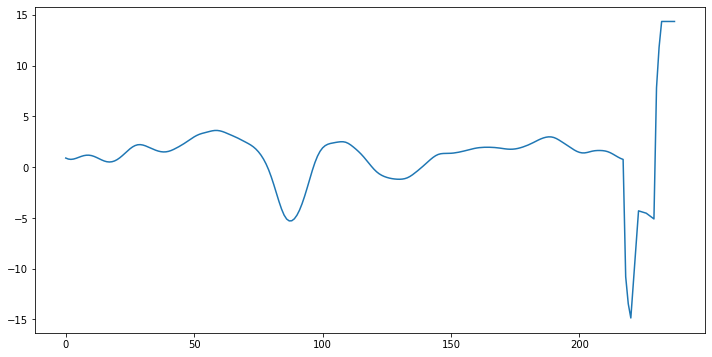

In [ ]:
df['gdp'].plot(figsize = (12,6))

Powyżej wykresy dwóch zmiennych po wypełnieniu NA's

Trend zmiennej objaśnianej inf

In [ ]:
import plotly.express as px

t = 'plotly_dark'

px.line(df, df['date'], df['inf'], template = t, title = 'Roczna zmiana cen żywności i napoi bezalkoholowych')

# Zagadnienia

## 1. Dyskusja na temat doboru zmiennych objaśniających

m3 - inflacja jest powodowana przez wzrost podaży pieniądza, który prowadzi do wzrostu popytu agregatowego. Im wyższy wskaźnik nominalnej podaży pieniądza, tym wyższy jest wskaźnik inflacji. 

polityka taniego pieniądza - inaczej polityka ekspansji kredytowej tj. niskich stóp procentowych prowadzi do zwiększa popyt na dobra i usługi. Wraz ze wzrastającą ekspansją kredytową, wzrasta dochód pieniężny kredytobiorców, co z kolei podnosi popyt w stosunku do podaży, prowadząc w ten sposób do inflacji (credit inducted inflation).

pkb - wzrost produktu krajowego brutto ceteris paribus spowoduje wzrost przeciętnej stopy procentowej. W przeciwnej sytuacji, recesja ceteris paribus spowoduje spadek przeciętnej stopy procentowej. To oczywiście ma pośredni wpływ na inflację


Z powyższych powodów zdecydowałem się na powyższe zmienne jednak najważniejszym powodem była dostępność danych w internecie. Pierwotnie chciałem użyć jako zmienne objaśniające takie wskaźniki jak:

* dochód dyspozycyjny europejczyka per capita
* wzrost publicznych wydatków
* wzrost exportu

Niestety nie mogłem znaleźć powyższych danych w ujęciu miesięcznym oraz w okresie mnie interesującym. Prawdopodobnie powyższe dane znacznie by ulepszyły model.

### Wszystkie zmienne

In [ ]:
cols = list(df.columns[1:-1])

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x= df['date'], y= df['inf'],mode='lines', name= 'Y'))

for i in cols:
    col = '{}'.format(i)
    fig.add_trace(go.Scatter(x=df['date'], y= df[col], mode='lines', name= i, opacity = 0.4))

fig.update_layout(template = t)

fig.show()

### Korelacje

In [ ]:
df.corr()[['inf']].sort_values(by = 'inf', ascending = False).iloc[1:,:]

,inf
int_rate,0.112792
m3,0.027070
gdp,-0.122921


### Istotność zmiennych Random Forest Regressor

In [ ]:
dates = df[['date']] # daty
y = df['inf'] # zmienna objasniana

In [ ]:
scaled_data = df.iloc[:,1:-1] # potencjalne wyskalowane zmienne objaśniające
scaled_data

,m3,gdp,int_rate
0,7.8,0.901042,4.25
1,7.4,0.800613,4.25
2,7.3,0.769820,4.25
3,7.3,0.800110,4.25
4,7.8,0.872959,4.25
...,...,...,...
233,8.4,14.354103,0.25
234,7.7,14.354103,0.25
235,8.0,14.354103,0.25
236,7.5,14.354103,0.25


Za pomocą Random Forest Regressor sprawdzę istotność zmiennych objasniających

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(scaled_data, y)

importances = model.feature_importances_
names = scaled_data.columns

importances_df = pd.DataFrame(importances)
importances_df['features'] = names
importances_df = importances_df[['features', 0]]
importances_df.rename(columns={0:'importances'}, inplace = True)
# importances_df

px.bar(importances_df, 'features','importances', title = 'importance of features', template = t)

### Test t-studenta

In [ ]:
from scipy import stats

stats.ttest_ind(df['m3'],df['inf'])

Ttest_indResult(statistic=10.556590685947105, pvalue=1.5349685777721867e-23)

In [ ]:
stats.ttest_ind(df['gdp'],df['inf'])

Ttest_indResult(statistic=-4.940245999277672, pvalue=1.0836497734188789e-06)

In [ ]:
stats.ttest_ind(df['int_rate'],df['inf'])

Ttest_indResult(statistic=-3.218441526816074, pvalue=0.001377241823232912)

Biorąc pod uwagę alfa = 0.05 oraz test t-studenta wszystkie zmienne wykazują p-value na poziomie niższym niż alfa zatem w trzech przypadkach możemy odrzucić hipotezę H0 na rzecz H1 i stwierdzić, że wszystkie zmienne są istotne względem zmiennej objaśnianej. P-value jest tak niskie (w praktyce można przyrównać do zera), że przyjęte alfa mogłoby być znacznie niższe.

## 2. Opis transformacji zmiennych 

### Standaryzacja

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df.iloc[:,1:]) # standaryzuje wyszystkie kolumny oprócz daty
scaled_data = pd.DataFrame(data = scaled_data, columns = list(df.columns)[1:]) # tworzę data frame
scaled_data[:5]

,m3,gdp,int_rate,inf
0,0.719020,-0.069054,1.427601,-0.038071
1,0.591433,-0.097573,1.427601,0.064894
2,0.559536,-0.106317,1.427601,-0.003749
3,0.559536,-0.097716,1.427601,-0.415608
4,0.719020,-0.077029,1.427601,-1.445253


In [ ]:
scaled_data.insert(loc=0, column='date', value=df[['date']])
df = scaled_data
df.head(3)

,date,m3,gdp,int_rate,inf
0,2002-01-01,0.719020,-0.069054,1.427601,-0.038071
1,2002-02-01,0.591433,-0.097573,1.427601,0.064894
2,2002-03-01,0.559536,-0.106317,1.427601,-0.003749


### Outliers detection & rejection

Do detekcji anomalii użyje biblioteki stworzonej przez Facebooka Prophet

In [ ]:
df.head()

,date,m3,gdp,int_rate,inf
0,2002-01-01,0.719020,-0.069054,1.427601,-0.038071
1,2002-02-01,0.591433,-0.097573,1.427601,0.064894
2,2002-03-01,0.559536,-0.106317,1.427601,-0.003749
3,2002-04-01,0.559536,-0.097716,1.427601,-0.415608
4,2002-05-01,0.719020,-0.077029,1.427601,-1.445253


Jako, że mamy 4 zmienne dla każdej oddzielnie usunę anomalie

In [ ]:
# przygotowanie danych do przeprocesowania przez Propheta
# Prophet wymaga dwóch kolumn o nazwach ds (datestamp) oraz y dlatego zamieniam nazwy kolumn

# m3
m3_df = df.iloc[:,:2]
m3_df.columns = ['ds','y'] 
# gdp
temp_df = pd.DataFrame(df.iloc[:,2])
gdp_df = pd.DataFrame(df.iloc[:,0])
gdp_df['gdp'] = temp_df
gdp_df.columns = ['ds','y']
# int_rate
temp_df = pd.DataFrame(df.iloc[:,3])
int_rate_df = pd.DataFrame(df.iloc[:,0])
int_rate_df['int_rate'] = temp_df
int_rate_df.columns = ['ds','y']
# inf
temp_df = pd.DataFrame(df.iloc[:,-1])
inf_df = pd.DataFrame(df.iloc[:,0])
inf_df['inf'] = temp_df
inf_df.columns = ['ds','y']

In [ ]:
def outlier_detection(df):
  from fbprophet import Prophet

  model = Prophet(daily_seasonality=False, yearly_seasonality=True, weekly_seasonality=False, interval_width=0.99, changepoint_range=0.8)

  model.fit(df)
  forecast = model.predict(df)[['ds','trend','yhat_lower','yhat_upper']] 
  # jeżeli punkt nie wpada pomiędzy yhat_lower a yhat_upper uznaje go za outliera
  forecast['real'] = df['y']
  forecast['outlier'] = 1 # 1 oznacza, że punkt NIE jest anomalią

  forecast.loc[forecast['real'] > forecast['yhat_upper'], 'outlier'] = -1
  forecast.loc[forecast['real'] < forecast['yhat_lower'], 'outlier'] = -1

  return forecast

In [ ]:
m3_data = outlier_detection(m3_df)
px.scatter(m3_data, x = 'ds', y='real', color = 'outlier', color_continuous_scale = 'Bluyl', title = 'M3 - Anomaly Detection in Time Series', template = 'plotly_dark', width = 950, height = 500)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [ ]:
gdp_data = outlier_detection(gdp_df)
px.scatter(gdp_data, x = 'ds', y='real', color = 'outlier', color_continuous_scale = 'Bluyl', title = 'GDP - Anomaly Detection in Time Series', template = 'plotly_dark', width = 950, height = 500)

Widać dużą anomalię spowodowaną globalną pandemią COVID-19

In [ ]:
int_rate_data = outlier_detection(int_rate_df)
px.scatter(int_rate_data, x = 'ds', y='real', color = 'outlier', color_continuous_scale = 'Bluyl', title = 'INT_RATE = Anomaly Detection in Time Series', template = 'plotly_dark', width = 950, height = 500)

Widoczne anomalie w okolicy kryzysu finansowego kredytów hipotecznych

In [ ]:
inf_data = outlier_detection(inf_df)
px.scatter(inf_data, x = 'ds', y='real', color = 'outlier', color_continuous_scale = 'Bluyl', title = 'INF - Anomaly Detection in Time Series', template = 'plotly_dark', width = 950, height = 500)

Zamiast outlierów wstawię nan

In [ ]:
# funkcja zamieniająca real na nan gdy jest outlierem
import numpy as np

def outliers_nan(real, outlier):

  if outlier == -1:
    return np.nan
  else:
    return real

In [ ]:
# uruchomienie funkcji

m3_data['real'] = m3_data.apply(lambda x: outliers_nan(x.real, x.outlier), axis=1)
gdp_data['real'] = gdp_data.apply(lambda x: outliers_nan(x.real, x.outlier), axis=1)
int_rate_data['real'] = int_rate_data.apply(lambda x: outliers_nan(x.real, x.outlier), axis=1)
inf_data['real'] = inf_data.apply(lambda x: outliers_nan(x.real, x.outlier), axis=1)

In [ ]:
# transformacja df

m3_data = m3_data[['ds','real']]
m3_data.columns = ['date','m3']

gdp_data = gdp_data[['ds','real']]
gdp_data.columns = ['date','gdp']

int_rate_data = int_rate_data[['ds','real']]
int_rate_data.columns = ['date','int_rate']

inf_data = inf_data[['ds','real']]
inf_data.columns = ['date','inf']

In [ ]:
print(m3_data.isna().sum())
print('\n')
print(gdp_data.isna().sum())
print('\n')
print(int_rate_data.isna().sum())
print('\n')
print(inf_data.isna().sum())

date    0
m3      1
dtype: int64


date     0
gdp     12
dtype: int64


date         0
int_rate    12
dtype: int64


date    0
inf     0
dtype: int64


Takim sposobem w miejsce outlierów wstawiłem NAN. Teraz ponownie za pomoca interpolacji wypełnię puste miejsca liniową funkcją. Powyżej widzimy ile mamy pustych komórek w każdym zestawie danych

##### M3

Przed detekcą

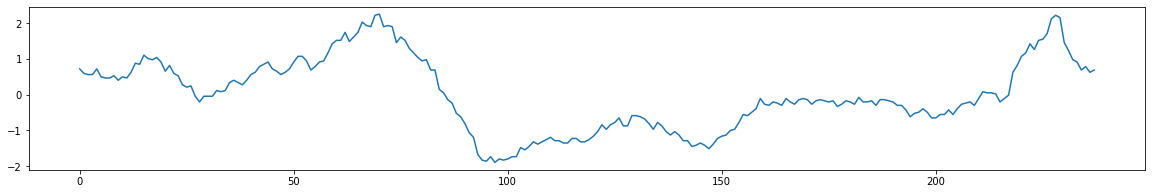

In [ ]:
df['m3'].plot(figsize = (20,3))

Po usunięciu outlierów

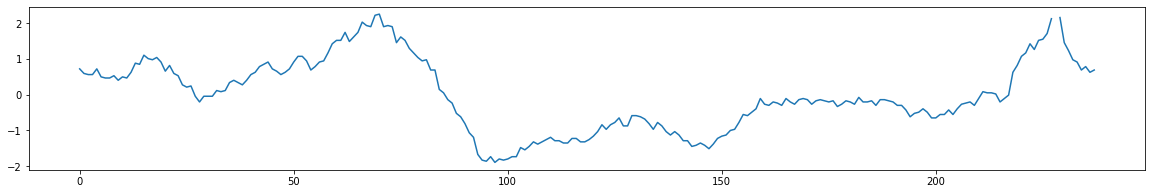

In [ ]:
m3_data['m3'].plot(figsize = (20,3))
m3_data['m3'].interpolate(method='linear', inplace = True)

Po interpolacji

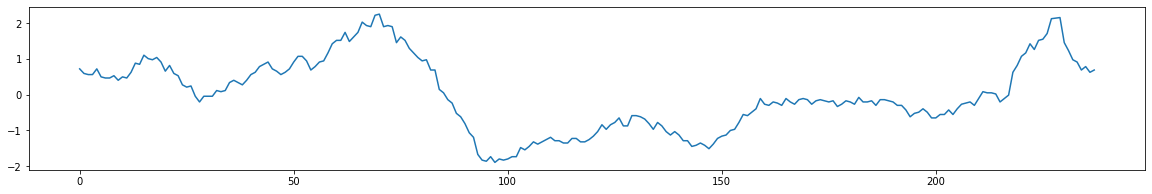

In [ ]:
m3_data['m3'].plot(figsize = (20,3))

##### GDP

Przed usunięciem outlierów

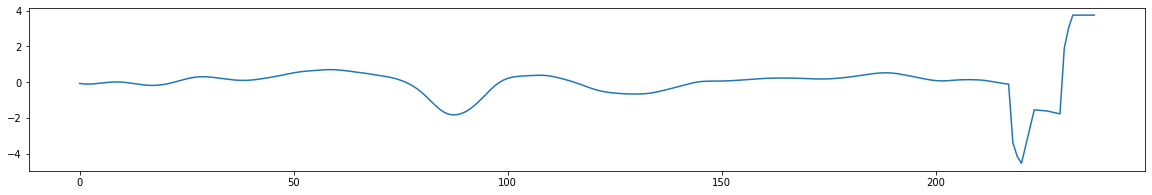

In [ ]:
df['gdp'].plot(figsize = (20,3))

Po usunięciu outlierów

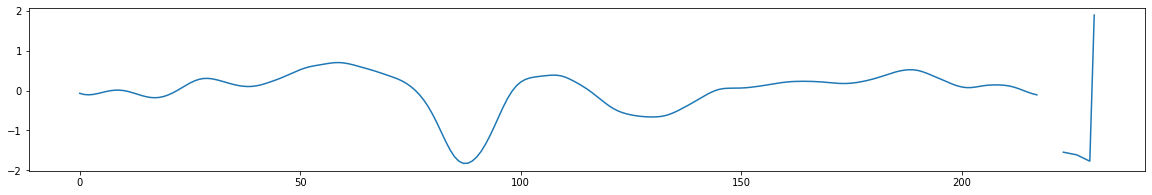

In [ ]:
gdp_data['gdp'].plot(figsize = (20,3))
gdp_data['gdp'].interpolate(method='linear',inplace = True)

Po interpolacji

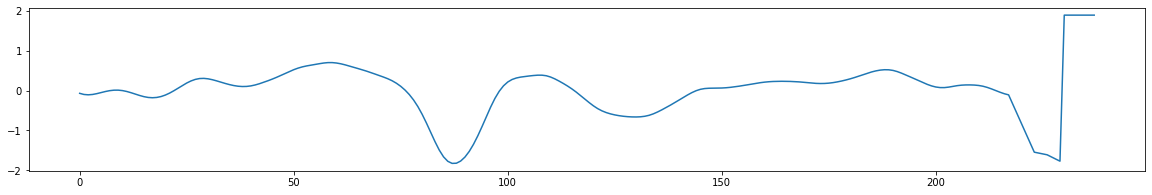

In [ ]:
gdp_data['gdp'].plot(figsize = (20,3))

##### INT_RATE

Przed detekcją anomalii

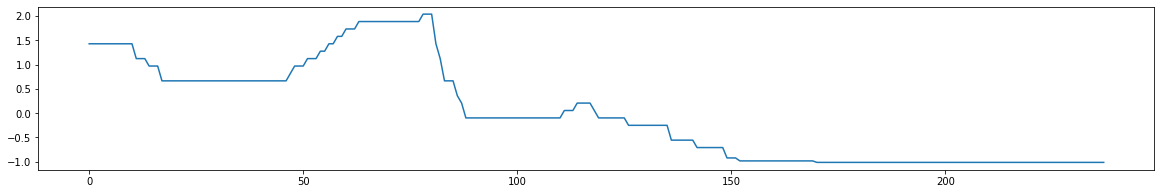

In [ ]:
df['int_rate'].plot(figsize = (20,3))

Po usunięciu outlierów

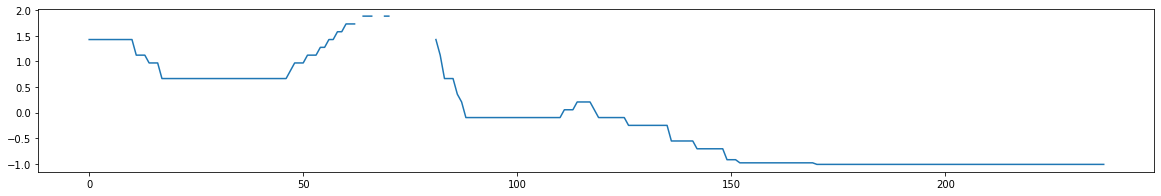

In [ ]:
int_rate_data['int_rate'].plot(figsize = (20,3))
int_rate_data['int_rate'].interpolate(method='linear',inplace = True)

Po interpolacji

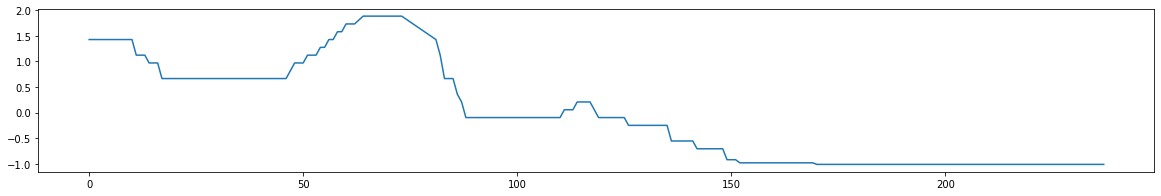

In [ ]:
int_rate_data['int_rate'].plot(figsize = (20,3))

##### INF

Przed detekcją anomalii

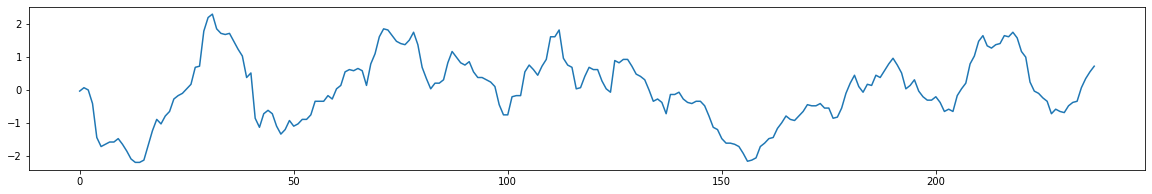

In [ ]:
df['inf'].plot(figsize = (20,3))

Po usunięciu outlierów

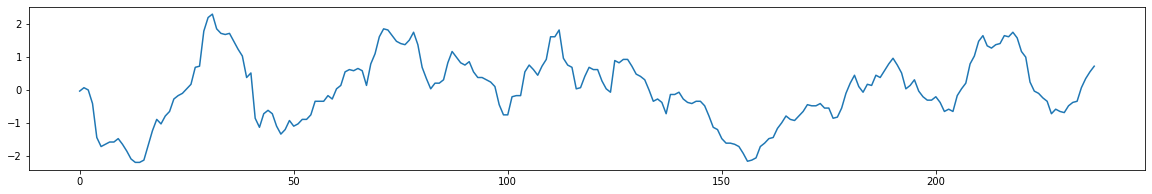

In [ ]:
inf_data['inf'].plot(figsize = (20,3))
inf_data['inf'].interpolate(method='linear',inplace = True)

Po interpolacji

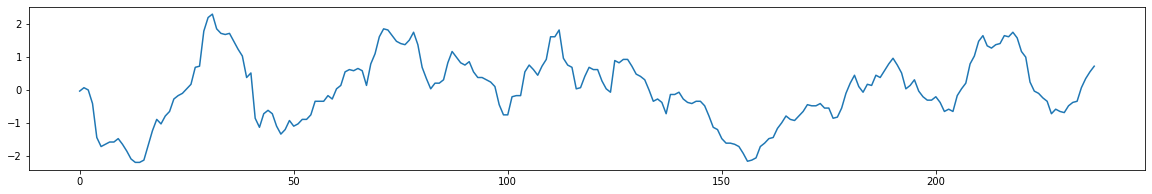

In [ ]:
inf_data['inf'].plot(figsize = (20,3))

Sprawdzam czy zostały jakieś NAN

In [ ]:
print(m3_data.isna().sum())
print('\n')
print(gdp_data.isna().sum())
print('\n')
print(int_rate_data.isna().sum())
print('\n')
print(inf_data.isna().sum())

date    0
m3      0
dtype: int64


date    0
gdp     0
dtype: int64


date        0
int_rate    0
dtype: int64


date    0
inf     0
dtype: int64


Połączmy wszystkie dane za pomocą left merge

In [ ]:
df = m3_data.merge(gdp_data, how = 'left', on = 'date').merge(int_rate_data, how = 'left', on = 'date').merge(inf_data, how = 'left', on = 'date').dropna()
df

,date,m3,gdp,int_rate,inf
0,2002-01-01,0.719020,-0.069054,1.427601,-0.038071
1,2002-02-01,0.591433,-0.097573,1.427601,0.064894
2,2002-03-01,0.559536,-0.106317,1.427601,-0.003749
3,2002-04-01,0.559536,-0.097716,1.427601,-0.415608
4,2002-05-01,0.719020,-0.077029,1.427601,-1.445253
...,...,...,...,...,...
233,2021-06-01,0.910401,1.893736,-1.015023,-0.346965
234,2021-07-01,0.687123,1.893736,-1.015023,0.064894
235,2021-08-01,0.782814,1.893736,-1.015023,0.339466
236,2021-09-01,0.623329,1.893736,-1.015023,0.545395


Zapisanie danych

In [ ]:
df.to_excel('df.xlsx', index = False)

## 3. Opis statystyk opisowych dla zmiennych po transformacji

In [ ]:
import pandas as pd

# df = pd.read_excel('df.xlsx')
df

,date,m3,gdp,int_rate,inf
0,2002-01-01,0.719020,-0.069054,1.427601,-0.038071
1,2002-02-01,0.591433,-0.097573,1.427601,0.064894
2,2002-03-01,0.559536,-0.106317,1.427601,-0.003749
3,2002-04-01,0.559536,-0.097716,1.427601,-0.415608
4,2002-05-01,0.719020,-0.077029,1.427601,-1.445253
...,...,...,...,...,...
233,2021-06-01,0.910401,1.893736,-1.015023,-0.346965
234,2021-07-01,0.687123,1.893736,-1.015023,0.064894
235,2021-08-01,0.782814,1.893736,-1.015023,0.339466
236,2021-09-01,0.623329,1.893736,-1.015023,0.545395


Poniżej zaprezentowano statystyki opisowe dla zmiennych po transformacji, zatem należy zwrócić uwagę, że zmienne są wystandaryzowane co oczywiście odbije się statystykach.

### podstawowe statystyki

In [ ]:
df.describe()

,m3,gdp,int_rate,inf
count,238.000000,238.000000,238.000000,2.380000e+02
mean,-0.000335,0.007298,-0.008980,-2.010530e-16
std,1.001376,0.666372,0.985797,1.002107e+00
min,-1.896524,-1.827543,-1.015023,-2.200326e+00
25%,-0.756211,-0.151754,-1.015023,-6.558581e-01
50%,-0.142196,0.121134,-0.099039,1.341135e-02
75%,0.719020,0.296522,0.664281,7.084219e-01
max,2.250070,1.893736,1.885593,2.295792e+00


### Skośność i kurtoza

In [ ]:
from scipy.stats import skew
from scipy.stats import kurtosis


for i in df.iloc[:,1:].columns:
  # df['']
  print('Skośność zmiennej {}: {}'.format(i, round(skew(df['{}'.format(i)]),4)))
print('\n')
for i in df.iloc[:,1:].columns:
  print('Kurtoza zmiennej {}: {}'.format(i, round(kurtosis(df['{}'.format(i)]),4)))

Skośność zmiennej m3: 0.1764
Skośność zmiennej gdp: -0.403
Skośność zmiennej int_rate: 0.4905
Skośność zmiennej inf: -0.0683


Kurtoza zmiennej m3: -0.7181
Kurtoza zmiennej gdp: 2.2436
Kurtoza zmiennej int_rate: -1.1372
Kurtoza zmiennej inf: -0.5154


* **Zmienna m3**

  Zmienna ma umiarkowaną skośność prawostronną oraz jest platykurtyczna, spłaszczona względem rozkładu normalnego

* **Zmienna gdp**

Zmienna jeśt lewoskośna oraz wyraźnie leptokurtyczna, tj. bardziej wydłużona i wąska względem rozkładu normalnego

* **Zmienna int_rate**

Zmienna umiarkowanie prawoskośna i silnie spłaszczona

* **Zmienna inf**

Zmienna delikatnie lewoskośna oraz umiarkowanie spłaszczona względem rozkładu normalnego

In [ ]:
def skew_kurto(column):
  import plotly.express as px
  import plotly.figure_factory as ff
  import plotly.graph_objects as go

  data = [list(column)]
  name = column.name

  fig1 = ff.create_distplot(data, ['{} distplot'.format(name)], bin_size = 0.2, curve_type = 'kde')

  fig2 = ff.create_distplot(data, ['Normal distribution'], bin_size = 0.2, curve_type = 'normal')
  normal_x = fig2.data[1]['x']
  normal_y = fig2.data[1]['y']

  fig1.update_layout(template = 'plotly_dark')

  fig1.add_traces(go.Scatter(x=normal_x, y=normal_y, mode = 'lines',
                          line = dict(color='rgba(0,255,0, 0.6)',
                                      width = 1),
                          name = 'normal'
                         ))
  
  return fig1.show()

In [ ]:
skew_kurto(df['m3'])

In [ ]:
skew_kurto(df['gdp'])

In [ ]:
skew_kurto(df['int_rate'])

In [ ]:
skew_kurto(df['inf'])

### Test JB

Przyjmuję poziom istotności na poziomie równym 0.05

In [ ]:
def jbtest(column):
  from scipy import stats
  jarque_bera_test = stats.jarque_bera(column)
  statistic = jarque_bera_test[0]
  p_value = jarque_bera_test[1]
  return print('statistic: ',jarque_bera_test[0],'\npvalue: ',jarque_bera_test[1], '\nBrak podstaw do odrzucenia H0, p-value jest większe od poziomu istotności 0.05, rozkład zmiennej jest zbliżony do rozkładu normalnego' if p_value > 0.05 else '\nOdrzucamy H0 na rzecz H1, p-value jest mniejsze od poziomu istotności 0.05, rozkład zmiennej nie jest zbliżony do rozkładu normalnego')

M3

In [ ]:
jbtest(df['m3'])

statistic:  6.347493474702757 
pvalue:  0.04184651591053368 
Odrzucamy H0 na rzecz H1, p-value jest mniejsze od poziomu istotności 0.05, rozkład zmiennej nie jest zbliżony do rozkładu normalnego


GDP

In [ ]:
jbtest(df['gdp'])

statistic:  56.35728366301579 
pvalue:  5.78315173527244e-13 
Odrzucamy H0 na rzecz H1, p-value jest mniejsze od poziomu istotności 0.05, rozkład zmiennej nie jest zbliżony do rozkładu normalnego


INT_RATE

In [ ]:
jbtest(df['int_rate'])

statistic:  22.367953072445765 
pvalue:  1.3895068899150154e-05 
Odrzucamy H0 na rzecz H1, p-value jest mniejsze od poziomu istotności 0.05, rozkład zmiennej nie jest zbliżony do rozkładu normalnego


INF

In [ ]:
jbtest(df['inf'])

statistic:  2.8190547315861076 
pvalue:  0.244258700893489 
Brak podstaw do odrzucenia H0, p-value jest większe od poziomu istotności 0.05, rozkład zmiennej jest zbliżony do rozkładu normalnego


In [ ]:
df.head()

,date,m3,gdp,int_rate,inf
0,2002-01-01,0.719020,-0.069054,1.427601,-0.038071
1,2002-02-01,0.591433,-0.097573,1.427601,0.064894
2,2002-03-01,0.559536,-0.106317,1.427601,-0.003749
3,2002-04-01,0.559536,-0.097716,1.427601,-0.415608
4,2002-05-01,0.719020,-0.077029,1.427601,-1.445253


Mimo braku rozkłądu normalnego wśród zmiennych postanawiam kontynuować z obecnym stanem zmiennych. Nie uważam, żeby miało to silny wpływ na model VAR

### Autokorelacja

Poniżej zaprezentowano wykresy Autocorrelation Function i Partial Autocorrelation Function dla 25 opóźnień. Poniższe wykresy są jedynie zobrazowaniem występowania bądź też braku autokorelacji. Do dobrania optymalnego hiperparamteru funkcji VAR wykorzystam gridsearch. Następnie każdy z modeli zostanie przetestowany m.in. przez Kryterium informacyjne Akaike (AIC)

In [ ]:
def acf_pacf(col):
  from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
  acf_plot = plot_acf(col, lags = 25)
  pacf_plot = plot_pacf(col, method = 'ols')

  return(col.name,acf_plot,'\n',pacf_plot,'\n')

from pandas.plotting import lag_plot

M3

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox as lb # Ljung Box test
lb(df[['m3']], lags = 25)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



(array([ 233.96858591,  460.54491583,  677.27708112,  882.72577451,
        1075.00967588, 1254.48513582, 1419.7925526 , 1570.07652839,
        1704.48200927, 1823.25020684, 1926.68363146, 2015.76570016,
        2094.01869586, 2162.00337078, 2220.72096076, 2270.79743902,
        2313.22151364, 2348.30396002, 2377.29069879, 2400.84690192,
        2419.94273429, 2435.07686189, 2447.115244  , 2456.25669099,
        2463.17118755]),
 array([8.12627672e-053, 9.86148217e-101, 1.77465341e-146, 9.21111560e-190,
        3.44955967e-230, 7.71329188e-268, 2.01328604e-302, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000]))

Wg testu LB możemy stwierdzić, że zachodzi autokorelacja, ponieważ p-value dla wszystkich opóźnień są bliskie zeru tj. możemy odrzucić H0 na rzecz H1

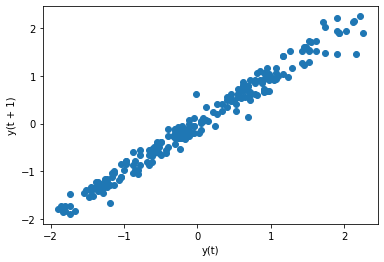

In [ ]:
lag_plot(df['m3'])

Zauważalna autokorelacja oraz niestacjonarność zmiennej

('m3',
 <Figure size 432x288 with 1 Axes>,
 '\n',
 <Figure size 432x288 with 1 Axes>,
 '\n')

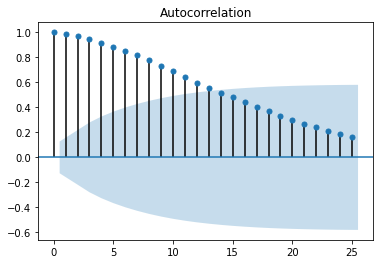

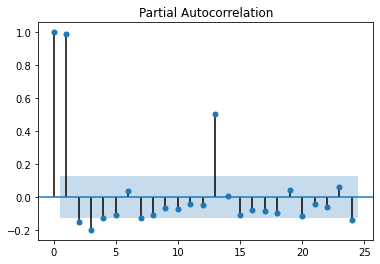

In [ ]:
acf_pacf(df['m3'])

autokorelacja do 13 opóźnienia pozostałe opóźnienia nie są istotne statystycznie. Wykres PACF jednak wykazuje bardziej dokłądne wyniki. Na podstawie tego wykresu możemy stwierdzić korelację pierwszego rzędu z opóźnieniami 1, 2, 3, 4, 7, 13, 25

GDP

In [ ]:
lb(df[['gdp']], lags = 25)

(array([200.84934411, 361.83277998, 484.03692664, 570.41174406,
        625.32235143, 654.8239165 , 666.28184676, 668.27799349,
        668.61018238, 668.63287922, 669.1914968 , 670.62353734,
        672.79680764, 675.64838825, 678.99526937, 682.81206229,
        687.0597472 , 691.70595856, 696.74518516, 702.2139815 ,
        708.19501404, 714.50392373, 720.97975485, 727.49044424,
        733.93623359]),
 array([1.36297509e-045, 2.68540715e-079, 1.37401237e-104, 3.92050589e-122,
        6.82390989e-133, 3.45625025e-138, 1.27935344e-139, 4.81740093e-139,
        3.85972922e-138, 3.38724396e-137, 2.15903945e-136, 8.52151580e-136,
        2.23688786e-135, 4.04937333e-135, 5.55554949e-135, 5.87059930e-135,
        4.88617730e-135, 3.26365849e-135, 1.75858069e-135, 7.52675791e-136,
        2.46327839e-136, 6.75649741e-137, 1.68223788e-137, 4.05853932e-138,
        9.96695068e-139]))

Wg testu LB możemy stwierdzić, że zachodzi autokorelacja, ponieważ p-value dla wszystkich opóźnień są bliskie zeru tj. możemy odrzucić H0 na rzecz H1

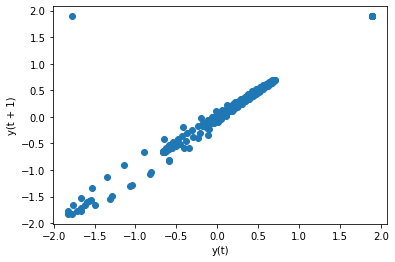

In [ ]:
lag_plot(df['gdp'])

Zauważalna autokorelacja oraz niestacjonarność zmiennej

('gdp',
 <Figure size 432x288 with 1 Axes>,
 '\n',
 <Figure size 432x288 with 1 Axes>,
 '\n')

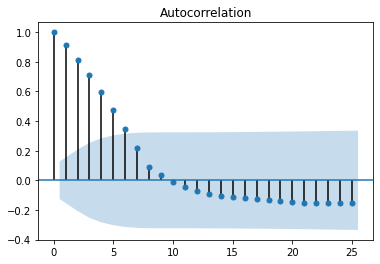

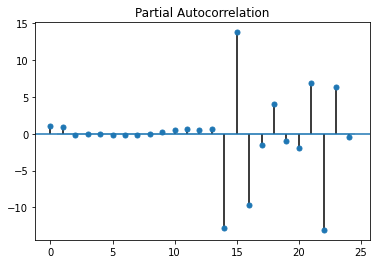

In [ ]:
acf_pacf(df['gdp'])

Wykres ACF wskazuje autokorelacja do ok. 6 opóźnienia pozostałe opóźnienia nie są istotne statystycznie. Wykres PACF jednak wykazuje bardziej dokłądne wyniki. Na podstawie tego wykresu możemy stwierdzić korelację pierwszego rzędu ze wszystkimi rzędami

INT_RATE

In [ ]:
lb(df[['int_rate']], lags = 40)

(array([ 236.55177056,  468.99614447,  696.89078751,  919.47799733,
        1136.24269946, 1346.70718686, 1550.22257242, 1746.52971162,
        1935.49908605, 2117.00359546, 2290.92691341, 2458.07822035,
        2618.48276735, 2772.04964861, 2919.26929388, 3060.29767377,
        3195.17883626, 3324.67073554, 3448.86922484, 3567.9921487 ,
        3682.22927876, 3791.70425841, 3896.70516945, 3997.49206793,
        4094.28395089, 4187.43676879, 4277.21661472, 4363.87294616,
        4447.84332419, 4529.3740291 , 4608.61311169, 4685.75265424,
        4761.0204167 , 4834.46321172, 4906.30613072, 4976.73542752,
        5045.80870648, 5113.68470782, 5180.40872548, 5246.08667419]),
 array([2.22124116e-053, 1.44138903e-102, 9.91362582e-151, 1.00310117e-197,
        1.89323437e-243, 8.37522175e-288, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.0000

Wg testu LB możemy stwierdzić, że zachodzi autokorelacja, ponieważ p-value dla wszystkich opóźnień są bliskie zeru tj. możemy odrzucić H0 na rzecz H1

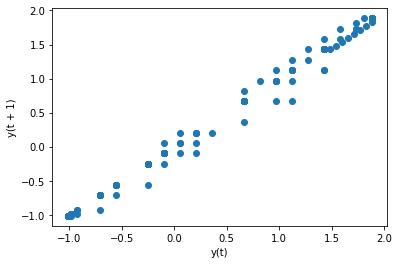

In [ ]:
lag_plot(df['int_rate'])

Zauważalna autokorelacja oraz niestacjonarność zmiennej

('int_rate',
 <Figure size 432x288 with 1 Axes>,
 '\n',
 <Figure size 432x288 with 1 Axes>,
 '\n')

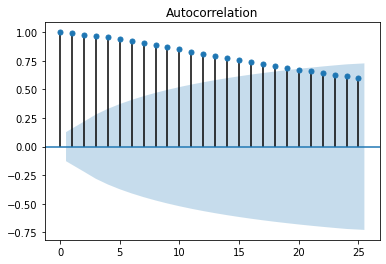

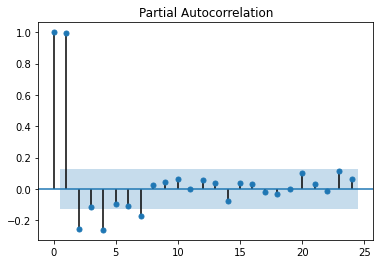

In [ ]:
acf_pacf(df['int_rate'])

autokorelacja do 18 opóźnienia pozostałe opóźnienia nie są istotne statystycznie. Wykres PACF jednak wykazuje bardziej dokłądne wyniki. Na podstawie tego wykresu możemy stwierdzić korelację pierwszego rzędu z opóźnieniami 1, 2, 4, 6

INF

In [ ]:
lb(df[['inf']], lags = 40)

(array([ 219.97618634,  409.92310962,  567.43381971,  695.73142259,
         798.85756724,  879.02990206,  938.27776364,  978.79666117,
        1003.16862641, 1015.20735146, 1019.45376303, 1020.11018603,
        1020.13425296, 1020.29080323, 1020.9361249 , 1022.39778672,
        1024.86308512, 1028.3937195 , 1033.09321561, 1038.67874733,
        1045.13955347, 1052.44671383, 1059.71347352, 1066.19485136,
        1071.59890229, 1075.71980113, 1079.05535574, 1081.50663799,
        1083.15706467, 1083.9444346 , 1084.06107676, 1084.1001839 ,
        1084.63234961, 1086.08967429, 1088.26447443, 1090.75962226,
        1093.6217576 , 1096.88377861, 1100.59310697, 1104.35181432]),
 array([9.15330555e-050, 9.69008851e-090, 1.15603944e-122, 2.92751702e-149,
        2.04378924e-170, 1.28225854e-186, 2.59755817e-198, 5.62997801e-206,
        3.57515687e-210, 9.90470335e-212, 1.24862980e-211, 8.89327432e-211,
        8.28116598e-210, 6.92829588e-209, 4.38283084e-208, 1.78984887e-207,
        4.3179

Wg testu LB możemy stwierdzić, że zachodzi autokorelacja, ponieważ p-value dla wszystkich opóźnień są bliskie zeru tj. możemy odrzucić H0 na rzecz H1

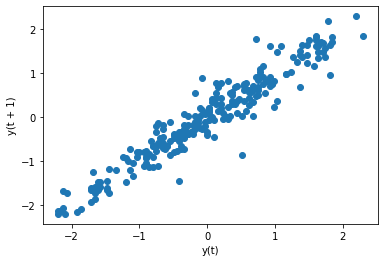

In [ ]:
lag_plot(df['inf'])

('inf',
 <Figure size 432x288 with 1 Axes>,
 '\n',
 <Figure size 432x288 with 1 Axes>,
 '\n')

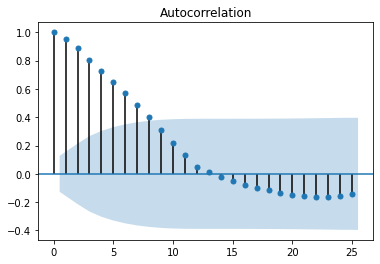

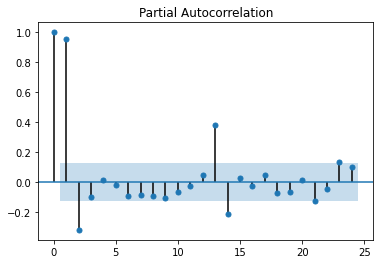

In [ ]:
acf_pacf(df['inf'])

autokorelacja do 7 opóźnienia pozostałe opóźnienia nie są istotne statystycznie. Wykres PACF jednak wykazuje bardziej dokłądne wyniki. Na podstawie tego wykresu możemy stwierdzić korelację pierwszego rzędu z opóźnieniami 1, 2, 13, 14.

### Stacjonarność / Niestacjonarność zmiennych

#### Test ADF

test na stacjonarność

##### M3

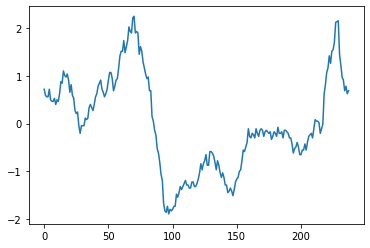

In [ ]:
df['m3'].plot()

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import adfuller

pval = adfuller(df['m3'])[1]

print('m3 p-value =',round(pval,4))

m3 p-value = 0.391


P-value jest większe niż alfa = 0.05, dlatego też nie mamy podstaw do odrzucenia H0. Zmienna nie jest stacjonarna. Ze względu na planowane użycie modelu VAR konieczne jest przeprowadzenie różnicowania.

In [ ]:
from statsmodels.tsa.statespace.tools import diff

m3_diff = diff(df['m3'], k_diff=1)
m3_diff

1     -0.127588
2     -0.031897
3      0.000000
4      0.159484
5     -0.223278
         ...   
233   -0.063794
234   -0.223278
235    0.095691
236   -0.159484
237    0.063794
Name: m3, Length: 237, dtype: float64

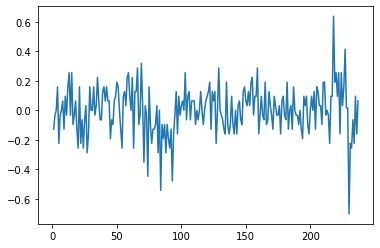

In [ ]:
m3_diff.plot()

In [ ]:
pval = adfuller(m3_diff)[1]
pval

9.587113819633624e-06

Jak możemy zauważyć zmienna jest stacjonarna po dyferencji jedynie jednego okresu. Test ADF wykazuje p-value mniejsze niż przyjęte alfa = 0.05 dlatego też możemy odrzucić H0 na rzecz H1 i stwierdzić, że zmienna jest stacjonarna.

In [ ]:
df['m3_1d'] = m3_diff # przypisanie nowych wartości do dataframe

##### GDP

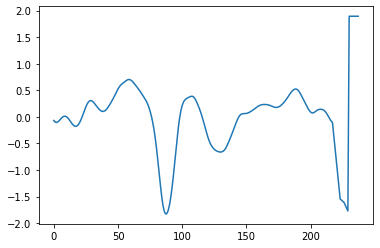

In [ ]:
df['gdp'].plot()

In [ ]:
pval = adfuller(df['gdp'])[1]

print('gdp p-value =',pval)

gdp p-value = 0.01336814407929016


P-value jest bliskie zeru zatem odrzucamy H0 na rzecz H1 i stwierdzamy że zmienna jest stacjonarna. Jednak zintegrowałem zmienną m3 o 1 dlatego zmienna gdp również musi być zintegorwana o 1.

In [ ]:
gdp_diff = diff(df['gdp'], k_diff=1)
gdp_diff

1     -0.028519
2     -0.008744
3      0.008602
4      0.020687
5      0.026629
         ...   
233    0.000000
234    0.000000
235    0.000000
236    0.000000
237    0.000000
Name: gdp, Length: 237, dtype: float64

po różnicowaniu o 1 opóźnienie

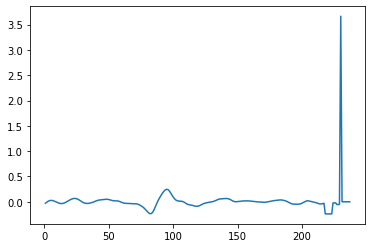

In [ ]:
gdp_diff.plot()

In [ ]:
df['gdp_1d'] = gdp_diff # przypisanie nowych wartości do dataframe

##### INT_RATE

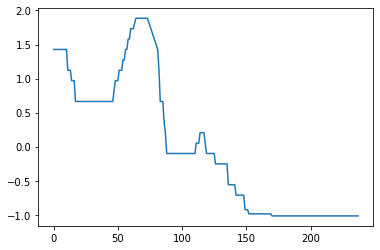

In [ ]:
df['int_rate'].plot()

In [ ]:
pval = adfuller(df['int_rate'])[1]

print('int_rate p-value =',round(pval,4))

int_rate p-value = 0.3788


Na poziomie istotności równym 0.05 oraz za pomocą testu AD Fullera możemy stwierdzic, że nie mamy podstaw do odrzucenia H0 na rzecz H1 zatem zmienna nie jest stacjonarna. Różnicuję zmienną o 1 opóźnienie.

In [ ]:
int_rate_diff = diff(df['int_rate'], k_diff=1)
int_rate_diff

1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
      ... 
233    0.0
234    0.0
235    0.0
236    0.0
237    0.0
Name: int_rate, Length: 237, dtype: float64

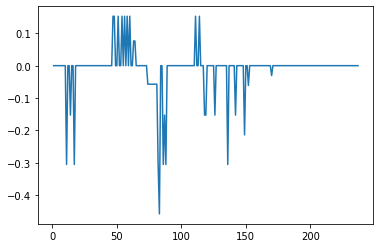

In [ ]:
int_rate_diff.plot()

In [ ]:
pval = adfuller(int_rate_diff)[1]
pval

0.01471769801188343

Jak widać differencing o 1 opóźnienie wystarczyło do uzyskania stacjonarności. P-value jest niższe niż 0.05 dlatego odrzucam H0 na rzecz H1 i stwierdzam, że zmienna jest stacjonarna.

In [ ]:
df['int_rate_1d'] = int_rate_diff # przypisanie nowych wartości do dataframe

##### INF

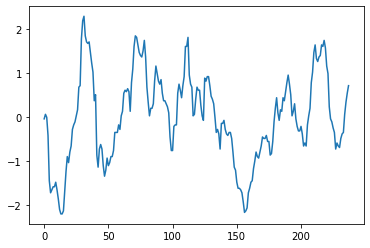

In [ ]:
df['inf'].plot()

In [ ]:
pval = adfuller(df['inf'])[1]

print('inf p-value =',round(pval,4))

inf p-value = 0.0137


Z przyjętym poziomem istotności 0.05 nie możemy odrzucić H0 i stwierdzamy, że zmienna nie jest stacjonarna. Użyję differencing z 1 opóźnieniem

In [ ]:
inf_diff = diff(df['inf'], k_diff=1)
inf_diff

1      0.102965
2     -0.068643
3     -0.411858
4     -1.029645
5     -0.274572
         ...   
233    0.034322
234    0.411858
235    0.274572
236    0.205929
237    0.171608
Name: inf, Length: 237, dtype: float64

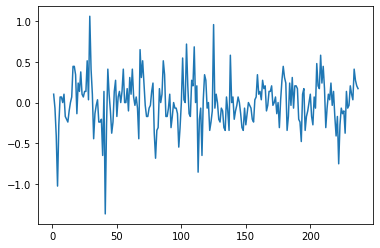

In [ ]:
inf_diff.plot()

In [ ]:
pval = adfuller(inf_diff)[1]
pval

5.2122701823660416e-06

Dzięki różnicowaniu o 1 opóźnienie mogliśmy pozbyć się niestacjonarności. p-value jest mniejsze od 0.05 zatem na podstawie testu ADF stwierdzam, że zmienna jest stacjonarna

In [ ]:
df['inf_1d'] = inf_diff # przypisanie nowych wartości do dataframe

Tworzę df_1d dla wartości zróżnicowanych i df dla wartości oryginalnych

In [ ]:
df_1d = df[['date','m3_1d','gdp_1d','int_rate_1d','inf_1d']]
df_1d.dropna(axis = 0, inplace = True)
df_1d

,date,m3_1d,gdp_1d,int_rate_1d,inf_1d
1,2002-02-01,-0.127588,-0.028519,0.0,0.102965
2,2002-03-01,-0.031897,-0.008744,0.0,-0.068643
3,2002-04-01,0.000000,0.008602,0.0,-0.411858
4,2002-05-01,0.159484,0.020687,0.0,-1.029645
5,2002-06-01,-0.223278,0.026629,0.0,-0.274572
...,...,...,...,...,...
233,2021-06-01,-0.063794,0.000000,0.0,0.034322
234,2021-07-01,-0.223278,0.000000,0.0,0.411858
235,2021-08-01,0.095691,0.000000,0.0,0.274572
236,2021-09-01,-0.159484,0.000000,0.0,0.205929


In [ ]:
df = df[['date','m3','gdp','int_rate','inf']]
df

,date,m3,gdp,int_rate,inf
0,2002-01-01,0.719020,-0.069054,1.427601,-0.038071
1,2002-02-01,0.591433,-0.097573,1.427601,0.064894
2,2002-03-01,0.559536,-0.106317,1.427601,-0.003749
3,2002-04-01,0.559536,-0.097716,1.427601,-0.415608
4,2002-05-01,0.719020,-0.077029,1.427601,-1.445253
...,...,...,...,...,...
233,2021-06-01,0.910401,1.893736,-1.015023,-0.346965
234,2021-07-01,0.687123,1.893736,-1.015023,0.064894
235,2021-08-01,0.782814,1.893736,-1.015023,0.339466
236,2021-09-01,0.623329,1.893736,-1.015023,0.545395


##### Podsumowanie

Wykres zmiennych przed różnicowaniem

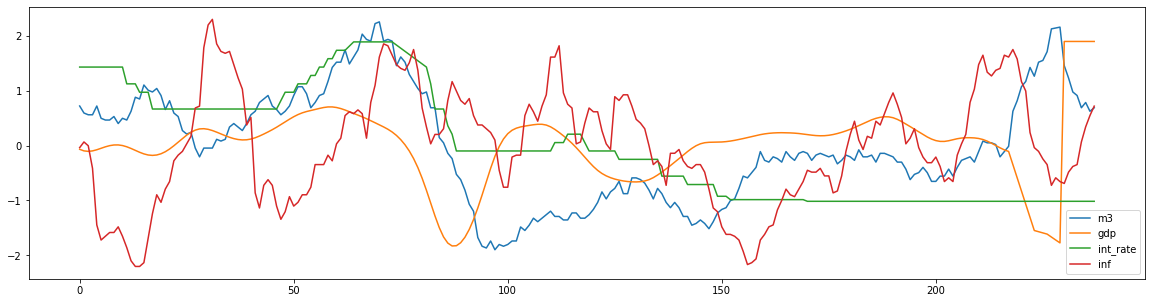

In [ ]:
for i in df.columns[1:]:  
  df['{}'.format(i)].plot(legend = True, figsize = (20,5))

Wykres zmiennych po różnicowaniu

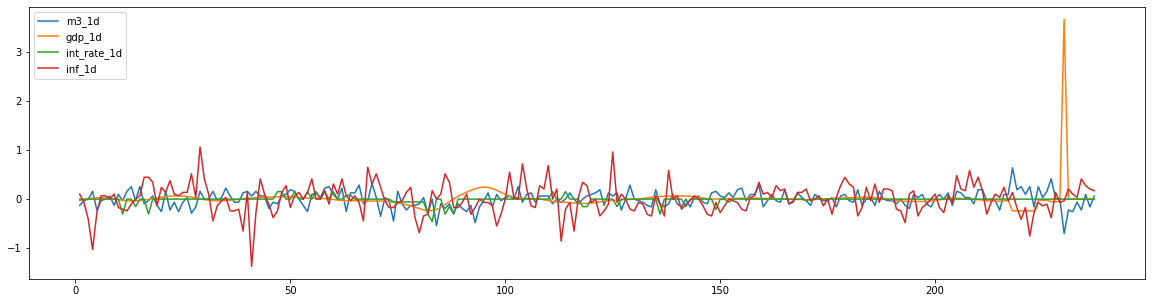

In [ ]:
for i in df_1d.columns[1:]:  
  df_1d['{}'.format(i)].plot(legend = True, figsize = (20,5))

## 4. Dobór dynamicznej specyfikacji modelu

Do modelu użyję oczywiście df_1d ze zmiennymi stacjonarnymi

In [ ]:
df_1d = df_1d.set_index('date').dropna()
df = df.set_index('date')
df_1d

,m3_1d,gdp_1d,int_rate_1d,inf_1d
date,,,,
2002-02-01,-0.127588,-0.028519,0.0,0.102965
2002-03-01,-0.031897,-0.008744,0.0,-0.068643
2002-04-01,0.000000,0.008602,0.0,-0.411858
2002-05-01,0.159484,0.020687,0.0,-1.029645
2002-06-01,-0.223278,0.026629,0.0,-0.274572
...,...,...,...,...
2021-06-01,-0.063794,0.000000,0.0,0.034322
2021-07-01,-0.223278,0.000000,0.0,0.411858
2021-08-01,0.095691,0.000000,0.0,0.274572


In [ ]:
df_1d.shape

(237, 4)

In [ ]:
df.shape

(238, 4)

### VAR

TRAIN TEST SPLIT

Chcemy przeprowadzić predykcje ex-post na 3 lata wstecz zatem stworzę zestaw treningowy do 2018-10, oraz zestaw testowy od 2018-11

In [ ]:
train_1d = df_1d[:-36]
train_1d

,m3_1d,gdp_1d,int_rate_1d,inf_1d
date,,,,
2002-02-01,-0.127588,-0.028519,0.0,0.102965
2002-03-01,-0.031897,-0.008744,0.0,-0.068643
2002-04-01,0.000000,0.008602,0.0,-0.411858
2002-05-01,0.159484,0.020687,0.0,-1.029645
2002-06-01,-0.223278,0.026629,0.0,-0.274572
...,...,...,...,...
2018-06-01,0.095691,-0.047988,0.0,-0.171608
2018-07-01,-0.095691,-0.044972,0.0,-0.102965
2018-08-01,-0.159484,-0.038182,0.0,0.000000


In [ ]:
test_1d = df_1d[-36:]
test_1d

,m3_1d,gdp_1d,int_rate_1d,inf_1d
date,,,,
2018-11-01,0.000000,-0.000430,0.0,-0.274572
2018-12-01,0.127588,0.012136,0.0,0.068643
2019-01-01,-0.127588,0.018689,0.0,-0.068643
2019-02-01,0.159484,0.018132,0.0,0.480501
2019-03-01,0.127588,0.012238,0.0,0.205929
2019-04-01,0.031897,0.005740,0.0,0.171608
2019-05-01,0.031897,0.000547,0.0,0.583466
2019-06-01,-0.095691,-0.003848,0.0,0.240251
2019-07-01,0.191381,-0.010023,0.0,0.446180


Gridsearch dla optymalnej wartości p dla modelu Autoregresji (AR) w modelu Wektorowej Autoregresji (VAR).

In [ ]:
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr

model = VAR(train_1d)
aic_df = pd.DataFrame(data = [], columns = ['p','aic'])
for p in range(1,25): 
  results = model.fit(p)
  aic = results.aic

  aic_df.loc[-1] = [p, aic]  # adding a row
  aic_df.index = aic_df.index + 1  # shifting index
  aic_df = aic_df.sort_index()  # sorting by index

In [ ]:
sorted_order = model.select_order(maxlags=24)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -16.79      -16.71   5.124e-08      -16.76
1       -20.12      -19.77   1.820e-09      -19.98
2       -22.90      -22.25   1.137e-10      -22.64
3       -24.39      -23.45   2.567e-11      -24.01
4       -25.09     -23.87*   1.268e-11     -24.60*
5       -25.09      -23.58   1.277e-11      -24.48
6       -25.19      -23.40   1.157e-11      -24.46
7       -25.09      -23.01   1.281e-11      -24.25
8       -24.99      -22.62   1.423e-11      -24.03
9       -24.95      -22.30   1.495e-11      -23.87
10      -24.87      -21.93   1.637e-11      -23.68
11      -24.89      -21.66   1.626e-11      -23.58
12      -25.25      -21.73   1.153e-11      -23.82
13      -25.21      -21.41   1.212e-11      -23.67
14      -25.18      -21.09   1.274e-11      -23.52
15      -25.11      -20.73   1.398e-11      -23.34
16      -25.16      -20.49   1.

Powyżej widzimy podsumowanie parametrów dla każdego z opóźnień. Program wstawia gwiazdkę przy najniższej wartości. 5 opóźnienie ma najniższe wartości BIC oraz HQIC. Sprawdźmy jak bardzo odbiega 5 opóźnienie jeżeli chodzi o AIC. 

In [ ]:
px.scatter(aic_df, x = 'p', y = 'aic', template = t, title = 'AIC score per VAR(p)')

Możemy zauważyć, że AIC znacząco spada do 4 opóźnienia (p). Później nadal spada jednak spadek jest powolny. Dzięki AIC możemy stwierdzić, że nie opłaca się bardziej komplikować modelu aniżeli do 5 opóźnienia. Późniejsze opóźnienia faktycznie dają lepszy wyniki modeli ale ich przyrost skomplikowania jest nieproporcjonalny w stosunku do efektywności. Dlatego też dla modelu VAR wybiorę p = 4.

In [ ]:
results = model.fit(4)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 04, Dec, 2021
Time:                     17:57:32
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -23.9231
Nobs:                     197.000    HQIC:                  -24.5976
Log likelihood:           1417.93    FPE:                1.31492e-11
AIC:                     -25.0564    Det(Omega_mle):     9.44301e-12
--------------------------------------------------------------------
Results for equation m3_1d
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                 -0.001340         0.010013           -0.134           0.894
L1.m3_1d              -0.087708         0.074046           -1.184           0.236
L1.gdp_1d            -11.991300         6.101318        

#### Ex-post

Pobieram 4 ostatnie opóźnienia zestawu treningowego aby móc przewidzieć kolejne wartości. 

Potrzebujemy matrycy o wymiarach (p,k) gdzie p to wybrane opóźnienie a k to ilość zmiennych (4,4)

Następnie uruchamiamy dopasowanie modelu do danych

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse


lagged_values = train_1d.values[-4:] # odpowiednia ilość opóźnień do predykcji ex-post
print('lagged_values shape:',lagged_values.shape,'\n')
z = results.forecast(y = lagged_values, steps = 36) # predykcje na 36 miesięcy


# teraz przekształce wyniki w łatnie wyglądający df
idx = pd.date_range('2018-11-01', periods = 36, freq = 'MS') # do tego potrzebuję indexów. dane sięgają do 2021-10, minus 3 lata to 2018-11
predicted_values = pd.DataFrame(data = z, index = idx, columns = df_1d.columns) # tworzę df

lagged_values shape: (4, 4) 



In [ ]:
z[10]

array([-0.00028846,  0.02908967, -0.00175723,  0.00944595])

Po przeprowadzeniu predykcji odwracamy transformacje danych

In [ ]:
# Odwracam differencing
nobs = 36
for i in df.columns:
  # Now build the forecast values from the first difference set
  predicted_values['{}_forecast'.format(i)] = df['{}'.format(i)].iloc[-nobs-1] + predicted_values['{}_1d'.format(i)].cumsum()

rescaling - odwrotność standaryzacji

In [ ]:
idx = predicted_values.reset_index()['index']
predicted_values = predicted_values[['m3_forecast','gdp_forecast','int_rate_forecast','inf_forecast']]
predicted_values = pd.DataFrame(data = scaler.inverse_transform(predicted_values), columns = predicted_values.columns)
predicted_values.insert(0, 'date', idx)

In [ ]:
predicted_values = predicted_values.set_index('date')
predicted_values.head()

,m3_forecast,gdp_forecast,int_rate_forecast,inf_forecast
date,,,,
2018-11-01,3.572378,1.405167,0.213686,1.282106
2018-12-01,3.489725,1.444127,0.182242,1.111781
2019-01-01,3.513822,1.517227,0.164948,1.158182
2019-02-01,3.413091,1.614914,0.151331,1.178134
2019-03-01,3.278385,1.728466,0.135656,1.154656


In [ ]:
# to jest nasz właściwy nieróżnicowany zestaw testowy
test = df[-nobs:]
test.head()

,m3,gdp,int_rate,inf
date,,,,
2018-11-01,-0.556855,0.074703,-1.015023,-0.655858
2018-12-01,-0.429268,0.086839,-1.015023,-0.587215
2019-01-01,-0.556855,0.105528,-1.015023,-0.655858
2019-02-01,-0.397371,0.123660,-1.015023,-0.175357
2019-03-01,-0.269783,0.135899,-1.015023,0.030572


Rescaling dla zestawu testowego bez różnicowania

In [ ]:
idx = test.reset_index()['date']
test = test[['m3','gdp','int_rate','inf']]
test = pd.DataFrame(data = scaler.inverse_transform(test), columns = test.columns)
test.insert(0, 'date', idx)
test = test.set_index('date')
test.head()

,m3,gdp,int_rate,inf
date,,,,
2018-11-01,3.8,1.407280,0.25,0.7
2018-12-01,4.2,1.450017,0.25,0.9
2019-01-01,3.8,1.515831,0.25,0.7
2019-02-01,4.3,1.579683,0.25,2.1
2019-03-01,4.7,1.622780,0.25,2.7


MSE: 12.031557598440198
RMSE: 3.4686535714078164
Mean: 3.783333333333333 



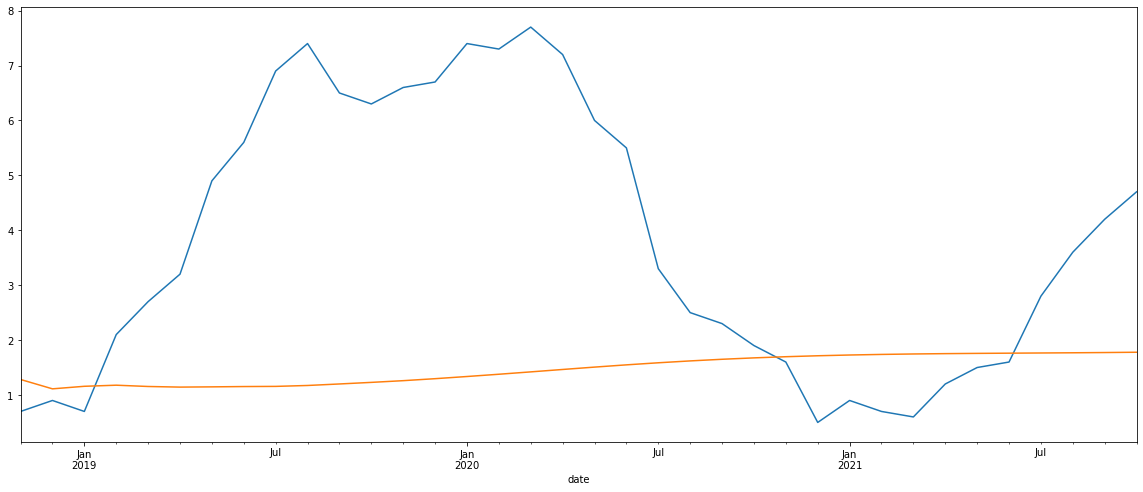

In [ ]:
# sprawdzę wykres dla danych teoretycznych i empirycznych
test['inf'].plot()
predicted_values['inf_forecast'].plot(figsize = (20,8))

# sprawdzam mse, rmse i dla porównania średnią z test set
print('MSE:',mean_squared_error(test['inf'], predicted_values['inf_forecast']))
print('RMSE:',rmse(test['inf'],predicted_values['inf_forecast']))
print('Mean:',test['inf'].mean(),'\n')

Wyniki są dosyć nieprecyzyjne, mimo pewnego dopasowania modelu do danych przewiduje on z bardzo małą szczegółowością

## 5. Interpretacja parametrów 

Finalny model

In [ ]:
results.params['inf_1d']

const             0.005505
L1.m3_1d         -0.153175
L1.gdp_1d         1.195757
L1.int_rate_1d    0.301016
L1.inf_1d         0.227222
L2.m3_1d         -0.060901
L2.gdp_1d         2.427229
L2.int_rate_1d   -0.181761
L2.inf_1d         0.072020
L3.m3_1d          0.179504
L3.gdp_1d        -8.494948
L3.int_rate_1d   -0.286761
L3.inf_1d        -0.107360
L4.m3_1d          0.122072
L4.gdp_1d         5.251334
L4.int_rate_1d    0.188146
L4.inf_1d        -0.022531
Name: inf_1d, dtype: float64

In [ ]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 04, Dec, 2021
Time:                     17:57:32
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -23.9231
Nobs:                     197.000    HQIC:                  -24.5976
Log likelihood:           1417.93    FPE:                1.31492e-11
AIC:                     -25.0564    Det(Omega_mle):     9.44301e-12
--------------------------------------------------------------------
Results for equation m3_1d
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                 -0.001340         0.010013           -0.134           0.894
L1.m3_1d              -0.087708         0.074046           -1.184           0.236
L1.gdp_1d            -11.991300         6.101318        

Równanie

inf = L1.inf

żadne opóźnienia zmiennych objaśniających nie są istotne statystycznie

## 6. Weryfikacja statystyczna modelu

### Istotność parametrów

poniżej istotne zmienne objasniajace dla 1 modelu

In [ ]:
pval = results.pvalues[['inf_1d']]
pval[pval['inf_1d']<0.05]

,inf_1d
L1.inf_1d,0.001786


### Dopasowanie do danych

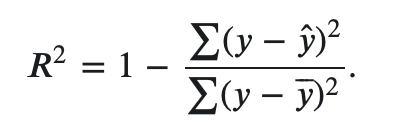

y - wartości empiryczne, y_hat - wartości teoretyczne y_dash - średnia wartości empirycznych

predykcje

In [ ]:
predicted_values[['inf_forecast']].head()

,inf_forecast
date,
2018-11-01,1.282106
2018-12-01,1.111781
2019-01-01,1.158182
2019-02-01,1.178134
2019-03-01,1.154656


dane testowe

In [ ]:
test[['inf']].head()

,inf
date,
2018-11-01,0.7
2018-12-01,0.9
2019-01-01,0.7
2019-02-01,2.1
2019-03-01,2.7


sprwadzam zgodność kształtów

In [ ]:
print(predicted_values.shape)
print(test.shape)

(36, 4)
(36, 4)


In [ ]:
y_hat = predicted_values['inf_forecast'].values
y_hat

array([1.28210567, 1.11178077, 1.15818177, 1.17813359, 1.15465569,
       1.14347928, 1.14782538, 1.15349136, 1.15641976, 1.17300141,
       1.20052338, 1.22940907, 1.26062379, 1.29677427, 1.33631895,
       1.37763124, 1.42061421, 1.46448999, 1.50760305, 1.54854114,
       1.58637567, 1.62041699, 1.65020935, 1.67563353, 1.69684998,
       1.71415804, 1.72793493, 1.73863498, 1.74677023, 1.75288245,
       1.75753521, 1.76130718, 1.76477025, 1.76846344, 1.7728715 ,
       1.77840695])

In [ ]:
y = test['inf'].values
y

array([0.7, 0.9, 0.7, 2.1, 2.7, 3.2, 4.9, 5.6, 6.9, 7.4, 6.5, 6.3, 6.6,
       6.7, 7.4, 7.3, 7.7, 7.2, 6. , 5.5, 3.3, 2.5, 2.3, 1.9, 1.6, 0.5,
       0.9, 0.7, 0.6, 1.2, 1.5, 1.6, 2.8, 3.6, 4.2, 4.7])

In [ ]:
y_dash = test['inf'].values.mean()
y_dash

3.783333333333333

In [ ]:
licznik = []
mianownik = []

for i in range(len(y)):
  licznik.append((y[i]-y_hat[i])**2)
  mianownik.append((y[i]-y_dash)**2)

R_sq = 1 - (sum(licznik) / sum(mianownik))
R_sq

-0.9751747619309914

R_sq jest gorszy niż R_sq modelu liniowego, oznacza to, że lepiej jest zastosować regresję liniową aniżeli oszacowany model.

## 8. Prognoza ex-ante

Przeprowadzę prognozę ex-ante dla roku 2022

model w podejściu pierwszym, który użyję miał p = 4 dlatego teraz stworzę df_init z 4 ostatnimi okresami z df

In [ ]:
df_init = df_1d.values[-4:]
df_init

array([[-0.22327817,  0.        ,  0.        ,  0.41185814],
       [ 0.09569065,  0.        ,  0.        ,  0.27457209],
       [-0.15948441,  0.        ,  0.        ,  0.20592907],
       [ 0.06379376,  0.        ,  0.        ,  0.17160756]])

In [ ]:
z_final = results.forecast(y = df_init, steps = 15) 
idx_final = pd.date_range('2021-10-01', periods = 15, freq = 'MS') 
predicted_values_ante = pd.DataFrame(data = z_final, index = idx_final, columns = df.columns) # tworzę df
predicted_values_ante

,m3,gdp,int_rate,inf
2021-10-01,-0.037652,0.000066,-0.006371,0.010433
2021-11-01,-0.025880,-0.000363,0.008197,-0.024965
2021-12-01,-0.010003,-0.001541,-0.008929,-0.020890
2022-01-01,0.006259,-0.003647,-0.007058,-0.007521
2022-02-01,-0.012857,-0.006505,-0.013405,-0.013577
2022-03-01,-0.011109,-0.009622,-0.014008,-0.002780
2022-04-01,-0.009570,-0.012392,-0.013961,0.001718
2022-05-01,-0.009508,-0.014336,-0.015646,0.006714
2022-06-01,-0.010313,-0.015202,-0.018277,0.005918
2022-07-01,-0.008689,-0.014983,-0.018793,0.006773


In [ ]:
predicted_values_ante.reset_index(inplace = True)
predicted_values_ante.rename(columns = {'index':'date'}, inplace = True)
predicted_values_ante

,date,m3,gdp,int_rate,inf
0,2021-10-01,-0.037652,0.000066,-0.006371,0.010433
1,2021-11-01,-0.025880,-0.000363,0.008197,-0.024965
2,2021-12-01,-0.010003,-0.001541,-0.008929,-0.020890
3,2022-01-01,0.006259,-0.003647,-0.007058,-0.007521
4,2022-02-01,-0.012857,-0.006505,-0.013405,-0.013577
5,2022-03-01,-0.011109,-0.009622,-0.014008,-0.002780
6,2022-04-01,-0.009570,-0.012392,-0.013961,0.001718
7,2022-05-01,-0.009508,-0.014336,-0.015646,0.006714
8,2022-06-01,-0.010313,-0.015202,-0.018277,0.005918
9,2022-07-01,-0.008689,-0.014983,-0.018793,0.006773


Integracja + rescalling

In [ ]:
# Odwracam differencing
nobs = 36
for i in df.columns:
  # Now build the forecast values from the first difference set
  predicted_values_ante['{}_forecast'.format(i)] = df['{}'.format(i)].iloc[-nobs-1] + predicted_values_ante['{}'.format(i)].cumsum()

In [ ]:
idx = predicted_values_ante.reset_index()['date']
predicted_values_ante = predicted_values_ante[['m3_forecast','gdp_forecast','int_rate_forecast','inf_forecast']]
predicted_values_ante = pd.DataFrame(data = scaler.inverse_transform(predicted_values_ante), columns = predicted_values_ante.columns)
predicted_values_ante.insert(0, 'date', idx)
predicted_values_ante

,date,m3_forecast,gdp_forecast,int_rate_forecast,inf_forecast
0,2021-10-01,3.681958,1.409026,0.239567,1.530399
1,2021-11-01,3.600823,1.407746,0.252990,1.457661
2,2021-12-01,3.569463,1.402320,0.238369,1.396796
3,2022-01-01,3.589086,1.389477,0.226811,1.374883
4,2022-02-01,3.548778,1.366570,0.204859,1.335326
5,2022-03-01,3.513950,1.332685,0.181920,1.327225
6,2022-04-01,3.483946,1.289045,0.159058,1.332231
7,2022-05-01,3.454138,1.238561,0.133437,1.351793
8,2022-06-01,3.421806,1.185027,0.103507,1.369034
9,2022-07-01,3.394566,1.132263,0.072732,1.388768


In [ ]:
px.scatter(predicted_values_ante,x = 'date',y = 'inf_forecast', template = t, title = 'Predykcje zmian wskaźnika inflacji Food and non-alcoholic beverages')

## 9. Podsumowanie 

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = df.reset_index()['date'] , y = df.reset_index()['inf'], name = 'known HICP'))
fig.add_trace(go.Scatter(x=predicted_values_ante['date'], y= predicted_values_ante['inf_forecast'], name = 'prediction'))

fig.update_layout(template = t)

fig.show()

Mimo słabego dopasowania modelu w predycji ex-post po ocenie wizualnej wykresu można stwierdzić, że predykcje są zasadne. Niestety, statystyczna ocena modelu jest słaba i należałoby dodać nowe zmienne objaśniające aby predykcja ex-post wykazała lepsze dopasowanie modelu do danych oraz wskaźniki MAE i RMSE.



---



# Dodatkowe modele

In [ ]:
train = df_1d[:-36]
test = df_1d[-36:]

In [ ]:
train_X = train.iloc[:,:-1]
train_y = train.iloc[:,-1:]
test_X = test.iloc[:,:-1]
test_y = test.iloc[:,-1:]

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

Ridge regression

In [ ]:
from sklearn.metrics import r2_score

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(train_X, train_y)
predictions_ridge = ridge.predict(test_X)
r2_score(test_y,predictions_ridge)
print('R^2 ridge regression:',r2_score(test_y,predictions_ridge))

R^2 ridge regression: -0.01745973143152857


Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression 

linear = LinearRegression()
linear.fit(train_X, train_y)
predictions_linear = linear.predict(test_X)
print('R^2 linear model:',r2_score(test_y,predictions_linear))

R^2 linear model: -0.02562395746698254


Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth = 20)
dtr.fit(train_X, train_y)
predictions_dtr = dtr.predict(test_X)
print('R^2 decision tree regressor model:',r2_score(test_y,predictions_dtr))

R^2 decision tree regressor model: -0.36165849754926493
